# Insolation

This notebook is adapted from the excellent [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook) by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.  The notebook closely follows section 2.7 of Dennis L. Hartmann, "Global Physical Climatology", Academic Press 1994.* 


## 1. Distribution of insolation
____________

The **amount of solar radiation** incident on the top of the atmosphere (what we call the "insolation") depends on

- latitude
- season
- time of day

This insolation is the primary driver of the climate system. Here we will examine the geometric factors that determine insolation, focussing primarily on the **daily average** values.

### Instantaneous solar flux

We can write the solar flux per unit surface area as

$$ Q = S_0 \left( \frac{\overline{r_s}}{r_s} \right)^2 \cos \theta_s $$

where $\overline{r_s}$ is the mean distance for which the flux density $S_0$ (i.e. the solar constant) is measured, and $r_s$ is the actual distance from the sun at time $t$.

#### Question:

- what factors determine $\left( \frac{\overline{r_s}}{r_s} \right)^2$ and under what circumstances would this ratio always equal 1?

Reminders:

### Solar zenith angle

We define the [*solar zenith angle*](https://en.wikipedia.org/wiki/Solar_zenith_angle#:~:text=The%20solar%20zenith%20angle%20is,rays%20and%20a%20horizontal%20plane.) $\theta_s$ as the angle between the local normal to Earth's surface and a line between a point on Earth's surface and the sun.

<img style="transform: rotate(90deg); width:800px" src="http://clima-dods.ictp.it/Users/tompkins/diploma/images/Hartmann_Fig2.5.png" />

From the above figure (reproduced from Hartmann's Global Climatology), the ratio of the shadow area to the surface area is equal to the cosine of the solar zenith angle.

The Earth’s orbit around the Sun traces out an [*ellipse*](https://en.wikipedia.org/wiki/Ellipse), with the Sun at one focal point.

<img src="images/esm_part1_orbit_earth.png" />


### Calculating the zenith angle

Just like the flux itself, the solar zenith angle depends latitude, season, and time of day.

#### Declination angle
The seasonal dependence can be expressed in terms of the *declination angle* of the sun: the latitude of the point on the surface of Earth directly under the sun at noon (denoted by $\delta$).

$\delta$ currently varies between +23.45º at northern summer solstice (June 21) to -23.45º at northern winter solstice (Dec. 21), as seen in the following schematic from jones 1995.


#### Hour angle

The [hour angle](https://en.wikipedia.org/wiki/Hour_angle) $h$ is defined as the longitude of the [subsolar](https://en.wikipedia.org/wiki/Subsolar_point) point relative to its position at noon, illustrated by the orange arrow in this diagram from Wikipedia 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e2/HourAngle_Observer_en.png/300px-HourAngle_Observer_en.png" />




#### Formula for zenith angle
With these definitions and some spherical geometry (see Appendix A of Hartmann's book), we can express the solar zenith angle for any latitude $\phi$, declination angle $\delta$ (i.e. season), and hour angle $h$ (i.e. time of day) as

$$ \cos \theta_s = \sin \phi \sin \delta + \cos\phi \cos\delta \cos h $$

#### Sunrise and sunset

If $\cos\theta_s < 0$ then the sun is below the horizon and the insolation is zero (i.e. it's night time!)

Sunrise and sunset occur when the solar zenith angle is 90º and thus $\cos\theta_s=0$. The above formula then gives

$$ \cos h_0 = - \tan\phi \tan\delta $$

where $h_0$ is the hour angle at sunrise and sunset.

#### Polar night

Near the poles special conditions prevail. Latitudes poleward of 90º-$\delta$ are constantly illuminated in summer, when $\phi$ and $\delta$ are of the same sign.  Right at the pole there is 6 months of perpetual daylight in which the sun moves around the compass at a constant angle $\delta$ above the horizon.

In the winter, $\phi$ and $\delta$ are of opposite sign, and latitudes poleward of 90º-$|\delta|$ are in perpetual darkness. At the poles, six months of daylight alternate with six months of daylight.

At the equator day and night are both 12 hours long throughout the year.

### Daily average insolation

Substituting the expression for solar zenith angle into the insolation formula gives the instantaneous insolation as a function of latitude, season, and time of day:

$$ Q = S_0 \left( \frac{\overline{d}}{d} \right)^2 \Big( \sin \phi \sin \delta + \cos\phi \cos\delta \cos h  \Big) $$

which is valid only during daylight hours, $|h| < h_0$, and $Q=0$ otherwise (night).

To get the daily average insolation, we integrate this expression between sunrise and sunset and divide by 24 hours (or $2\pi$ radians since we express the time of day in terms of hour angle):

$$ \overline{Q}^{day} = \frac{1}{2\pi} \int_{-h_0}^{h_0} Q ~dh$$

$$ = \frac{S_0}{2\pi} \left( \frac{\overline{d}}{d} \right)^2 \int_{-h_0}^{h_0} \Big( \sin \phi \sin \delta + \cos\phi \cos\delta \cos h  \Big) ~ dh $$

which is easily integrated to get our formula for daily average insolation:

$$ \overline{Q}^{day} = \frac{S_0}{\pi} \left( \frac{\overline{d}}{d} \right)^2 \Big( h_0 \sin\phi \sin\delta + \cos\phi \cos\delta \sin h_0 \Big)$$

where the hour angle at sunrise/sunset $h_0$ is in radians.

### The daily average zenith angle

It turns out that, due to optical properties of the Earth's surface (particularly bodies of water), the surface albedo depends on the solar zenith angle. It is therefore useful to consider the average solar zenith angle during daylight hours as a function of latidude and season.

The appropriate daily average here is weighted with respect to the insolation, rather than weighted by time. The formula is

$$ \overline{\cos\theta_s}^{day} = \frac{\int_{-h_0}^{h_0} Q \cos\theta_s~dh}{\int_{-h_0}^{h_0} Q ~dh} $$

<img src="http://clima-dods.ictp.it/Users/tompkins/diploma/images/Hartmann_Fig2.8.png" />

The average zenith angle is much higher at the poles than in the tropics. This contributes to the very high surface albedos observed at high latitudes.


## 2. Computing daily insolation with `climlab`
____________

Here are some examples calculating daily average insolation at different locations and times.

These all use a function called 
```
daily_insolation
``` 
in the package 
```
climlab.solar.insolation
``` 
to do the calculation. The code implements the above formulas to calculates daily average insolation anywhere on Earth at any time of year.

The code takes account of *orbital parameters* to calculate current Sun-Earth distance.  

We can look up *past orbital variations* to compute their effects on insolation using the package 
```
climlab.solar.orbital
```
See the [next lecture](./Lecture14 -- Orbital variations.ipynb)!

### Using the `daily_insolation` function

In [1]:
#%pip install wheel
#%pip install netCDF4

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from climlab import constants as const
from climlab.solar.insolation import daily_insolation

First, get a little help on using the `daily_insolation` function:

In [5]:
help(daily_insolation)

Help on function daily_insolation in module climlab.solar.insolation:

daily_insolation(lat, day, orb={'ecc': 0.017236, 'long_peri': 281.37, 'obliquity': 23.446}, S0=1365.2, day_type=1, days_per_year=365.2422)
    Compute daily average insolation given latitude, time of year and orbital parameters.
    
    Orbital parameters can be interpolated to any time in the last 5 Myears with
    ``climlab.solar.orbital.OrbitalTable`` (see example above).
    
    Longer orbital tables are available with ``climlab.solar.orbital.LongOrbitalTable``
    
    Inputs can be scalar, ``numpy.ndarray``, or ``xarray.DataArray``.
    
    The return value will be ``numpy.ndarray`` if **all** the inputs are ``numpy``.
    Otherwise ``xarray.DataArray``.
    
    **Function-call argument** 
    
    
    :param array lat:       Latitude in degrees (-90 to 90).
    :param array day:       Indicator of time of year. See argument ``day_type``
                            for details about format.
    :param dic

Here are a few simple examples.

First, compute the daily average insolation at 45ºN on January 1:

In [6]:
daily_insolation(45,1)

123.95321551807459

Same location, July 1:

In [7]:
daily_insolation(45,181)

482.356497522712

We could give an array of values. Let's calculate and plot insolation at all latitudes on the spring equinox = March 21 = Day 80

Text(0.5, 1.0, 'Daily average insolation on March 21')

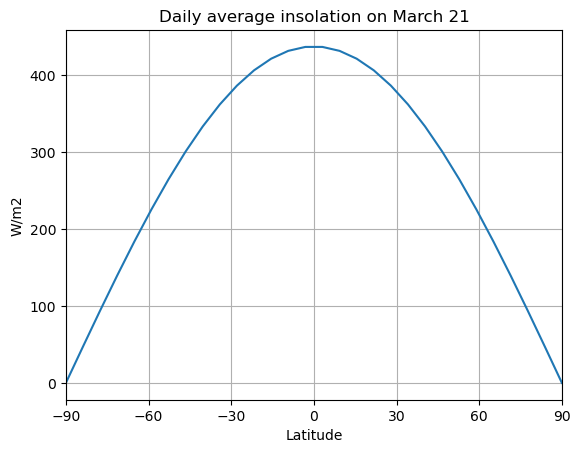

In [8]:
lat = np.linspace(-90., 90., 30)
Q = daily_insolation(lat, 80)
fig, ax = plt.subplots()
ax.plot(lat,Q)
ax.set_xlim(-90,90); ax.set_xticks([-90,-60,-30,-0,30,60,90])
ax.set_xlabel('Latitude')
ax.set_ylabel('W/m2')
ax.grid()
ax.set_title('Daily average insolation on March 21')

### exercises

Try to answer the following questions **before reading the rest of these notes**.

- What is the daily insolation today here at Trieste (latitude 45.65ºN)?
- What is the **annual mean** insolation at the latitude of Trieste?
- At what latitude and at what time of year does the **maximum daily insolation** occur?
- What latitude is experiencing either **polar sunrise** or **polar sunset** today?



## 3. Global, seasonal distribution of insolation (present-day orbital parameters)
____________

Calculate an array of insolation over the year and all latitudes (for present-day orbital parameters). We'll use a dense grid in order to make a nice contour plot

In [9]:
lat = np.linspace( -90., 90., 500)
days = np.linspace(0, const.days_per_year, 365 )
Q = daily_insolation( lat, days )

And make a contour plot of Q as function of latitude and time of year.

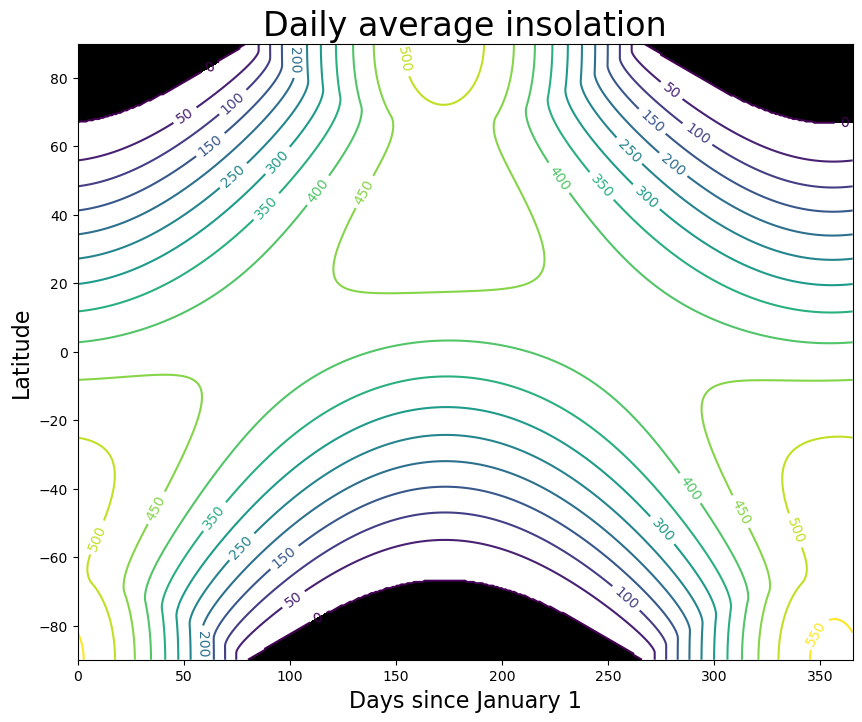

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
CS = ax.contour( days, lat, Q , levels = np.arange(0., 600., 50.) )
ax.clabel(CS, CS.levels, inline=True, fontsize=10)
ax.set_xlabel('Days since January 1', fontsize=16 )
ax.set_ylabel('Latitude', fontsize=16 )
ax.set_title('Daily average insolation', fontsize=24 )
ax.contourf ( days, lat, Q, levels=[-1000., 0.], colors='k' )

### Time and space averages

Take the area-weighted global, annual average of Q...

In [11]:
Qaverage = np.average(np.mean(Q, axis=1), weights=np.cos(np.deg2rad(lat)))
print( 'The annual, global average insolation is %.2f W/m2.' %Qaverage)

The annual, global average insolation is 341.38 W/m2.


Also plot the zonally averaged insolation at a few different times of the year:

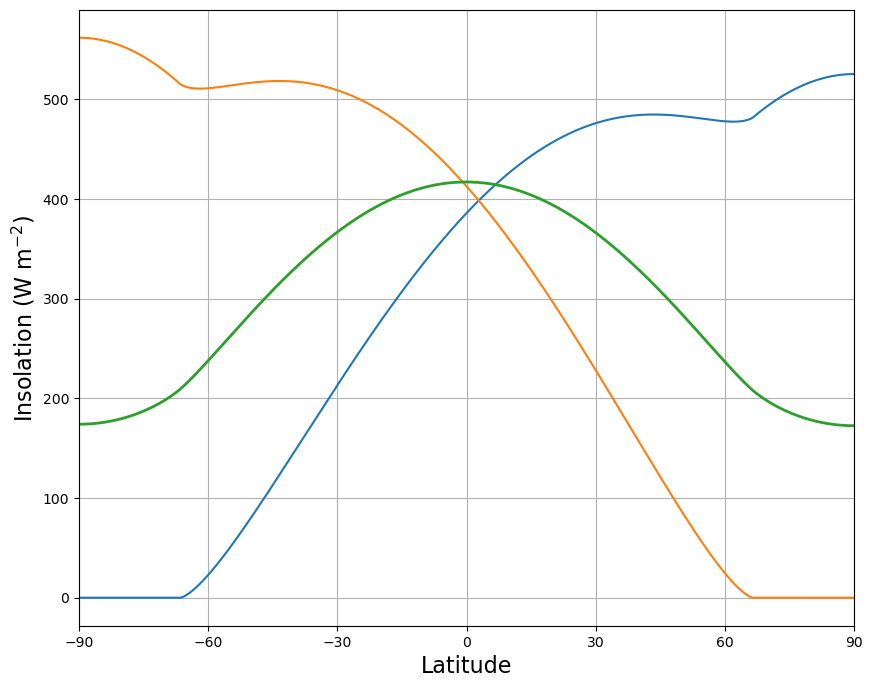

In [12]:
summer_solstice = 170
winter_solstice = 353
fig, ax = plt.subplots(figsize=(10,8))
ax.plot( lat, Q[:,(summer_solstice, winter_solstice)] );
ax.plot( lat, np.mean(Q, axis=1), linewidth=2 )
ax.set_xbound(-90, 90)
ax.set_xticks( range(-90,100,30) )
ax.set_xlabel('Latitude', fontsize=16 );
ax.set_ylabel('Insolation (W m$^{-2}$)', fontsize=16 );
ax.grid()



## Credits

This notebook was adapted (with permission and huge thanks!) from the excellent and highly recommended [Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook), an open-source textbook developed and maintained by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

Brian's original book is licensed for free and open consumption under the
[Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license. Development of the original notes and the [climlab software](https://github.com/brian-rose/climlab) is partially supported by the National Science Foundation under award AGS-1455071 to Brian Rose. 
